In [57]:
import pandas as pd
import string
from helperFunctions import *
from matplotlib import pyplot as plt
import numpy as np

In [58]:
#change the path to the location of the tweets.csv file on your computer
df_tweets = pd.read_csv("../data/tweets.csv")

In [59]:
tweets = df_tweets['content'].tolist()
df_tweets.head()

,content
0,Love it!
1,So awesome. Read my morning meditation anytime...
2,"Just replaced one add with another, albeit AA ..."
3,Don't bother upgrading. There is zero differen...
4,Every time I go to share the reading it pops u...


In [63]:
#change the path to the location of the common_abb_keyword.csv file on your computer
df_abbreviations = pd.read_csv('../data/common_abb_keyword.csv')
df_abbreviations.head()


,Acronym,Expansion
0,2day,today
1,2m2h,too much too handle
2,2moro,tomorrow
3,2nite,tonight
4,4eae,for ever and ever


In [ ]:
abbreviations_dict = df_abbreviations.set_index('Acronym')['Expansion'].to_dict()
abbreviations_dict

In [65]:
def replace_abbreviations(tweet, abbreviations_dict):
    
    results = []
    for sentence in tweet:
        words = sentence.split()
        for i, word in enumerate(words):
            stripped_word = word.strip(string.punctuation)
            for key, value in abbreviations_dict.items():
                if stripped_word == key:
                    words[i] = value+ word[len(stripped_word):]
                    break
        results.append(" ".join(words))
    return results

In [ ]:
results = replace_abbreviations(tweets[:100], abbreviations_dict)

for i in range(100):
    print(tweets[i])
    print(results[i])

In [67]:
# Generate some evaluation points
#tVals is a list of values of possible number of tweets
tVals = [2**k for k in range(9)] 
tVals += [k*10 for k in range(20)]
tVals += [k*50 for k in range(2,25)]
tVals.sort() # put them in order
print(tVals)

[0, 1, 2, 4, 8, 10, 16, 20, 30, 32, 40, 50, 60, 64, 70, 80, 90, 100, 100, 110, 120, 128, 130, 140, 150, 150, 160, 170, 180, 190, 200, 250, 256, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200]


In [34]:
tValsRec, timeValsRec = calculateTimeForEachN(replace_abbreviations, tVals, tweets, abbreviations_dict, numTrials=5)

Text(0.5, 1.0, 'Keyword Replacement Algorithm')

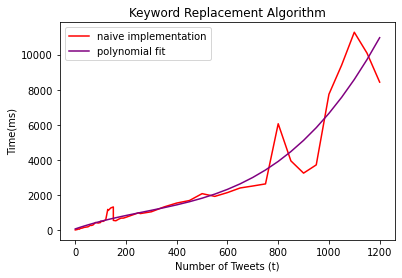

In [48]:
plt.plot(tValsRec, timeValsRec, color="red", label="naive implementation")
# after we look at the data, change the False flag to True to fit a quadratic
if True:
    coeffs = np.polyfit( tValsRec, timeValsRec, 3 )
    plt.plot(tValsRec, [  coeffs[3] +coeffs[2]*t + coeffs[1]*t**2 + coeffs[0]*t**3 for t in tValsRec], color="purple", label="polynomial fit")
   
plt.xlabel("Number of Tweets (t)")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Keyword Replacement Algorithm")